In [2]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dropout,Dense,LSTM,GlobalMaxPooling1D,Bidirectional,Conv1D,Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


In [4]:
vocab_size=20000
max_length=500

(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=vocab_size)
x_train=pad_sequences(x_train,maxlen=max_length)
x_test=pad_sequences(x_test,maxlen=max_length)

In [9]:
model=Sequential([
    Embedding(input_dim=vocab_size,output_dim=256,input_length=max_length),
    Conv1D(128,5,activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_2               │ ?                           │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
optimizer=Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
early_stop=EarlyStopping(monitor='val_accuracy',patience=2,restore_best_weights=True)
model.fit(x_train,y_train,epochs=6,batch_size=512,validation_split=0.2,verbose=2,callbacks=[early_stop])

Epoch 1/6
40/40 - 206s - 5s/step - accuracy: 0.6416 - loss: 0.6386 - val_accuracy: 0.7688 - val_loss: 0.5095
Epoch 2/6
40/40 - 189s - 5s/step - accuracy: 0.8164 - loss: 0.4118 - val_accuracy: 0.8524 - val_loss: 0.3347
Epoch 3/6
40/40 - 200s - 5s/step - accuracy: 0.9007 - loss: 0.2503 - val_accuracy: 0.8972 - val_loss: 0.2607
Epoch 4/6
40/40 - 207s - 5s/step - accuracy: 0.9530 - loss: 0.1377 - val_accuracy: 0.9040 - val_loss: 0.2475
Epoch 5/6
40/40 - 178s - 4s/step - accuracy: 0.9828 - loss: 0.0616 - val_accuracy: 0.9042 - val_loss: 0.2661
Epoch 6/6
40/40 - 182s - 5s/step - accuracy: 0.9930 - loss: 0.0301 - val_accuracy: 0.9040 - val_loss: 0.2966


In [11]:
loss,accuracy=model.evaluate(x_test,y_test)
print(f"Accuracy:{accuracy*100:.2f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 63ms/step - accuracy: 0.8892 - loss: 0.2916
Accuracy:88.87


In [12]:
y_pred=model.predict(x_test)
y_pred_label=(y_pred>0.5).astype(int).flatten()

782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step


In [13]:
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(y_test,y_pred_label)

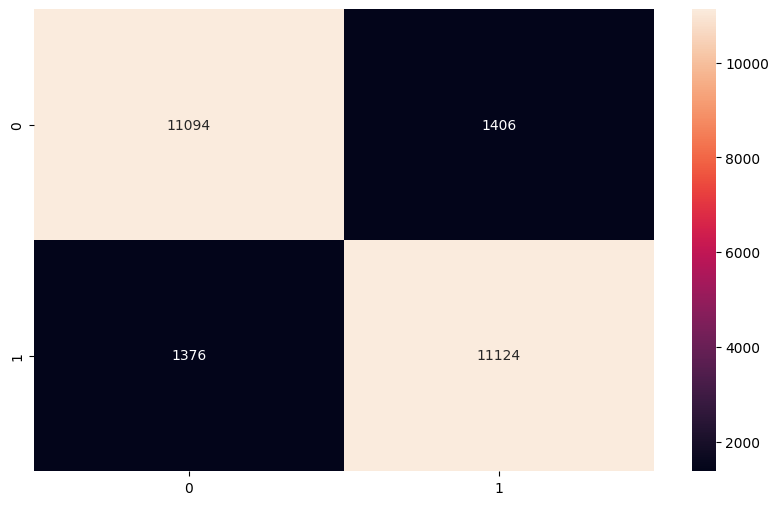

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

In [18]:
print("Classification report")
print(classification_report(y_test,y_pred_label))

Classification report
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     12500
           1       0.89      0.89      0.89     12500

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000



In [29]:
example_index=6
sample_review=x_test[example_index]
sample_review=sample_review.reshape(1,-1)

prediction=model.predict(sample_review)[0][0]
prediction_label=int(prediction>0.5)

print(f"Probability:{prediction}")
print("Prediction:","Positive" if prediction_label==1 else "Negative")
print("Actual:","Positive" if y_test[example_index]==1 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Probability:0.744214653968811
Prediction: Positive
Actual: Positive
